# Assignment Decision Trees

Student: Alberto Daniel Quiroga Villalobos
Student ID: 25550047

In [1]:
pip install matplotlib scikit-learn --upgrade

In [3]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
import math

from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score    

Question 1. [15 points] The following figure shows the entropy (𝑦 axis) for groups with different class distribution (𝑥 axis).  

Please calculate the entropy for group A,  B and C respectively with Python, round the results to 2 decimal places.    

In [10]:
def entropy(p):
    return -(p*math.log2(p) + (1-p)*math.log2(1-p))

entropy_A = entropy(.2)
entropy_B = entropy(.7)
entropy_C = entropy(.9)

print(f"Entropy for Group A is {entropy_A:.2f}")
print(f"Entropy for Group B is {entropy_B:.2f}")
print(f"Entropy for Group C is {entropy_C:.2f}")

Entropy for Group A is 0.72
Entropy for Group B is 0.88
Entropy for Group C is 0.47


Question 2.  [10 points] The following figure shows the relationship between total number of instances in a group (𝑥 axis) and the estimated positive probability (𝑦 axis) based on Laplace-corrected (dashed line) and Frequency-based (solid line) approach. 

Point C, D and E represent three groups with different total number of instances, and their frequency-based positive probabilities are 80% (for group C & D) and 100% (for group E) respectively. 

Please calculate the Laplace corrected positive probability for group C, D and E with Python, round the results to 2 decimal places.  

In [13]:
def laplace_corrected(k, n):
    return (k + 1) / (n + 2)

Laplace_C = laplace_corrected(8,10)
Laplace_D = laplace_corrected(16,20)
Laplace_E = laplace_corrected(10,10)

print(f"The Laplace corrected positive probability for group C is {Laplace_C: .2f}")
print(f"The Laplace corrected positive probability for group D is {Laplace_D: .2f}")
print(f"The Laplace corrected positive probability for group E is {Laplace_E: .2f}")

The Laplace corrected positive probability for group C is  0.75
The Laplace corrected positive probability for group D is  0.77
The Laplace corrected positive probability for group E is  0.92


Question 3. [40 points] Explore the dataset churn.csv and answer the following 
questions with Python.    

The target variable is LEAVE.  

(a) [5 points] Load the data, calculate the entropy for the entire dataset.  

(b) [10 points] Segment the dataset with attribute REPORTED_SATISFACTION. 

Create a cross table to calculate the entropy for each child node, save the results in a new column named child_entropy.   
Then weigh each child node's entropy by the proportion of instances in it and save the results in a column named weighted_entropy. Display the data frame.  

(c) [5 points] Calculate the information gain for REPORTED_SATISFACTION.  
Round the result to 4 decimal places.    

(d) [5 points] Next, create a subset that only contains very unsatisfied customers (i.e., REPORTED_SATISFACTION == ‘very_unsat’), how many customers are there? What is the entropy of this subset? 

(e) [5 points] Segment the subset created in step (d) into two new child notes according to whether the customer’s INCOME value is above the average or not.  
How many instances are there in each child node?  

(f) [10 points] Create a cross table to calculate the information gain for INCOME on the subset. Display the cross table and the information gain. Round the result to 4 decimal places.

(a) [5 points] Load the data, calculate the entropy for the entire dataset.  

In [18]:
churn = pd.read_csv('churn.csv', sep = ' ')

display(churn.shape, churn.head())

(20000, 12)

,COLLEGE,INCOME,OVERAGE,LEFTOVER,HOUSE,HANDSET_PRICE,OVER_15MINS_CALLS_PER_MONTH,AVERAGE_CALL_DURATION,REPORTED_SATISFACTION,REPORTED_USAGE_LEVEL,CONSIDERING_CHANGE_OF_PLAN,LEAVE
1,zero,31953,0,6,313378,161,0,4,unsat,little,no,STAY
2,one,36147,0,13,800586,244,0,6,unsat,little,considering,STAY
3,one,27273,230,0,305049,201,16,15,unsat,very_little,perhaps,STAY
4,zero,120070,38,33,788235,780,3,2,unsat,very_high,considering,LEAVE
5,one,29215,208,85,224784,241,21,1,very_unsat,little,never_thought,STAY


In [19]:
churn['LEAVE'].value_counts()

LEAVE
STAY     10148
LEAVE     9852
Name: count, dtype: int64

In [20]:
stay = churn['LEAVE'].value_counts()['STAY']/churn.shape[0]

leave = 1 - stay

print(f"The proportion of people that stay is {stay: .2f}")
print(f"The proportion of people that leave is {leave: .2f}")

The proportion of people that stay is  0.51
The proportion of people that leave is  0.49


In [22]:
entropy_dataset = -stay * np.log2(stay) - leave * np.log2(leave)

print(f"The entropy of the entire dataset is {entropy_dataset: .5f}")

The entropy of the entire dataset is  0.99984


(b) [10 points] Segment the dataset with attribute REPORTED_SATISFACTION. 
Create a cross table to calculate the entropy for each child node, save the results in a new column named child_entropy.   

Then weigh each child node's entropy by the proportion of instances in it and save the results in a column named weighted_entropy. Display the data frame.

In [24]:
table_reported_satisfaction = pd.crosstab(churn['REPORTED_SATISFACTION'], churn['LEAVE']) 

display(table_reported_satisfaction)

LEAVE,LEAVE,STAY
REPORTED_SATISFACTION,,
avg,960,1062
sat,477,548
unsat,2005,1986
very_sat,2469,2584
very_unsat,3941,3968


In [46]:
table_reported_satisfaction['total'] = table_reported_satisfaction.sum(axis=1)

table_reported_satisfaction['stay_proportion'] = table_reported_satisfaction['STAY']/table_reported_satisfaction['total']
table_reported_satisfaction['leave_proportion'] = table_reported_satisfaction['LEAVE']/table_reported_satisfaction['total']

display(table_reported_satisfaction)

LEAVE,LEAVE,STAY,total,stay_proportion,leave_proportion
REPORTED_SATISFACTION,,,,,
avg,960,1062,2022,0.525223,0.474777
sat,477,548,1025,0.534634,0.465366
unsat,2005,1986,3991,0.497620,0.502380
very_sat,2469,2584,5053,0.511379,0.488621
very_unsat,3941,3968,7909,0.501707,0.498293


In [48]:
table_reported_satisfaction['child_entropy'] = - table_reported_satisfaction['stay_proportion'] * np.log2(table_reported_satisfaction['stay_proportion']) - table_reported_satisfaction['leave_proportion'] * np.log2(table_reported_satisfaction['leave_proportion']) 

display(table_reported_satisfaction)

LEAVE,LEAVE,STAY,total,stay_proportion,leave_proportion,child_entropy
REPORTED_SATISFACTION,,,,,,
avg,960,1062,2022,0.525223,0.474777,0.998164
sat,477,548,1025,0.534634,0.465366,0.996536
unsat,2005,1986,3991,0.497620,0.502380,0.999984
very_sat,2469,2584,5053,0.511379,0.488621,0.999626
very_unsat,3941,3968,7909,0.501707,0.498293,0.999992


In [49]:
table_reported_satisfaction['proportion'] = table_reported_satisfaction['total']/churn.shape[0]  

display(table_reported_satisfaction)

LEAVE,LEAVE,STAY,total,stay_proportion,leave_proportion,child_entropy,proportion
REPORTED_SATISFACTION,,,,,,,
avg,960,1062,2022,0.525223,0.474777,0.998164,0.10110
sat,477,548,1025,0.534634,0.465366,0.996536,0.05125
unsat,2005,1986,3991,0.497620,0.502380,0.999984,0.19955
very_sat,2469,2584,5053,0.511379,0.488621,0.999626,0.25265
very_unsat,3941,3968,7909,0.501707,0.498293,0.999992,0.39545


In [50]:
table_reported_satisfaction['weighted_entropy'] = table_reported_satisfaction['child_entropy'] * table_reported_satisfaction['proportion']

display(table_reported_satisfaction)

LEAVE,LEAVE,STAY,total,stay_proportion,leave_proportion,child_entropy,proportion,weighted_entropy
REPORTED_SATISFACTION,,,,,,,,
avg,960,1062,2022,0.525223,0.474777,0.998164,0.10110,0.100914
sat,477,548,1025,0.534634,0.465366,0.996536,0.05125,0.051072
unsat,2005,1986,3991,0.497620,0.502380,0.999984,0.19955,0.199547
very_sat,2469,2584,5053,0.511379,0.488621,0.999626,0.25265,0.252556
very_unsat,3941,3968,7909,0.501707,0.498293,0.999992,0.39545,0.395447


(c) [5 points] Calculate the information gain for REPORTED_SATISFACTION.  
Round the result to 4 decimal places.

In [54]:
information_gain_satisfaction = entropy_dataset - table_reported_satisfaction['weighted_entropy'].sum()                 

print(f"The information gained for reported satisfaction is {information_gain_satisfaction: .4f}")

The information gained for reported satisfaction is  0.0003


(d) [5 points] Next, create a subset that only contains very unsatisfied customers (i.e., REPORTED_SATISFACTION == ‘very_unsat’), how many customers are there? What is the entropy of this subset?

In [61]:
very_unsat_table = churn[churn['REPORTED_SATISFACTION'] == 'very_unsat']

display(very_unsat_table.shape, very_unsat_table.head())
print(f"Number of very unsatisfied customers is{len(very_unsat_table): .0f}")

(7909, 12)

,COLLEGE,INCOME,OVERAGE,LEFTOVER,HOUSE,HANDSET_PRICE,OVER_15MINS_CALLS_PER_MONTH,AVERAGE_CALL_DURATION,REPORTED_SATISFACTION,REPORTED_USAGE_LEVEL,CONSIDERING_CHANGE_OF_PLAN,LEAVE
5,one,29215,208,85,224784,241,21,1,very_unsat,little,never_thought,STAY
7,zero,42052,224,0,697949,191,10,5,very_unsat,little,actively_looking_into_it,STAY
8,one,84744,0,20,688098,357,0,5,very_unsat,little,considering,STAY
13,zero,23553,244,0,926178,158,4,5,very_unsat,very_little,actively_looking_into_it,STAY
18,zero,41513,0,15,214276,167,1,2,very_unsat,very_high,considering,STAY


Number of very unsatisfied customers is 7909


In [60]:
very_unsat_table['LEAVE'].value_counts()

LEAVE
STAY     3968
LEAVE    3941
Name: count, dtype: int64

In [64]:
very_unsat_stay = very_unsat_table['LEAVE'].value_counts()['STAY']/very_unsat_table.shape[0]

very_unsat_leave = 1 - very_unsat_stay

entropy_very_unsat = -very_unsat_stay * np.log2(very_unsat_stay) - very_unsat_leave * np.log2(very_unsat_leave)

print(f"The entropy of the subset of unsatisfied customers is {entropy_very_unsat: .5f}")

The entropy of the subset of unsatisfied customers is  0.99999


(e) [5 points] Segment the subset created in step (d) into two new child notes according to whether the customer’s INCOME value is above the average or not.  
How many instances are there in each child node?  

In [66]:
average_income = very_unsat_table['INCOME'].mean() #calculates average income

average_bolean = very_unsat_table['INCOME'] > average_income #boolean to see if income checked is bigger than average

above_average_income_table = very_unsat_table[average_bolean] # (e) put in subset those whose income values are above average
below_average_income_table = very_unsat_table[~average_bolean] # (e) put in subset those whose income values are below or at average

print(f"There are{len(above_average_income_table): .0f} instances of above average income")
print(f"There are{len(below_average_income_table): .0f} instances of below or at average income")

There are 3687 instances of above average income
There are 4222 instances of below or at average income


(f) [10 points] Create a cross table to calculate the information gain for INCOME on the subset. Display the cross table and the information gain. Round the result to 4 decimal places.

In [67]:
income_cross_table = pd.crosstab(average_bolean.rename("Is_Income_Above_Average"), very_unsat_table['LEAVE']) 

display(income_cross_table)

LEAVE,LEAVE,STAY
Is_Income_Above_Average,,
False,1940,2282
True,2001,1686


In [68]:
income_cross_table['total'] = income_cross_table.sum(axis=1)

income_cross_table['leave_proportion'] = income_cross_table['LEAVE']/income_cross_table['total']
income_cross_table['stay_proportion'] = income_cross_table['STAY']/income_cross_table['total']

display(income_cross_table)

LEAVE,LEAVE,STAY,total,leave_proportion,stay_proportion
Is_Income_Above_Average,,,,,
False,1940,2282,4222,0.459498,0.540502
True,2001,1686,3687,0.542718,0.457282


In [69]:
income_cross_table['child_entropy'] = - income_cross_table['leave_proportion'] * np.log2(income_cross_table['leave_proportion']) - income_cross_table['stay_proportion'] * np.log2(income_cross_table['stay_proportion']) 

display(income_cross_table)

LEAVE,LEAVE,STAY,total,leave_proportion,stay_proportion,child_entropy
Is_Income_Above_Average,,,,,,
False,1940,2282,4222,0.459498,0.540502,0.995262
True,2001,1686,3687,0.542718,0.457282,0.994728


In [70]:
income_cross_table['proportion'] = income_cross_table['total']/very_unsat_table.shape[0]  

display(income_cross_table)

LEAVE,LEAVE,STAY,total,leave_proportion,stay_proportion,child_entropy,proportion
Is_Income_Above_Average,,,,,,,
False,1940,2282,4222,0.459498,0.540502,0.995262,0.533822
True,2001,1686,3687,0.542718,0.457282,0.994728,0.466178


In [71]:
income_cross_table['weighted_entropy'] = income_cross_table['child_entropy'] * income_cross_table['proportion']
display(income_cross_table)

LEAVE,LEAVE,STAY,total,leave_proportion,stay_proportion,child_entropy,proportion,weighted_entropy
Is_Income_Above_Average,,,,,,,,
False,1940,2282,4222,0.459498,0.540502,0.995262,0.533822,0.531293
True,2001,1686,3687,0.542718,0.457282,0.994728,0.466178,0.463720


In [72]:
entropy_very_unsat_income = income_cross_table['weighted_entropy'].sum()                

information_gain_income = entropy_dataset - entropy_very_unsat_income        

print(f"The information gained for income above or below average is {information_gain_income: .4f}")

The information gained for income above or below average is  0.0048


Question 4. [30 points] We’d like to train a decision tree model to predict whether a customer will leave or not.  Continue to work with the dataset churn.csv and answer the following questions with Python. 

(a) Load the data, remove three string features (i.e., REPORTED_SATISFACTION, REPORTED_USAGE_LEVEL, CONSIDERING_CHANGE_OF_PLAN) and convert the variable COLLEAGE as numbers. Display the shape of the cleaned dataset. 

(b) Prepare the cleaned data by getting features and target variable properly. Split the data into train and test set, with 20% of the data used for model evaluation. Set random seed as 42. Display the shape of all returned datasets.

(c) Train a decision tree classifier on the train set, set min_samples_leaf = 1000, max_depth  = 3, random_state = 1. Name the model as model2 and visualize it. 
(Hint: you may adjust the figure size to have the tree displayed properly.)  

(d) Apply model2 to predict the class labels and estimate the class probabilities for test set only.  Display the results for the first five test instances only.     

(e) Check model2’s performance on the test set.  Round the result to 2 decimal places.

(a) Load the data, remove three string features (i.e., REPORTED_SATISFACTION, REPORTED_USAGE_LEVEL, CONSIDERING_CHANGE_OF_PLAN) and convert the variable COLLEAGE as numbers. Display the shape of the cleaned dataset.

In [73]:
churn = pd.read_csv('churn.csv', sep = ' ')

display(churn.shape, churn.head())

(20000, 12)

,COLLEGE,INCOME,OVERAGE,LEFTOVER,HOUSE,HANDSET_PRICE,OVER_15MINS_CALLS_PER_MONTH,AVERAGE_CALL_DURATION,REPORTED_SATISFACTION,REPORTED_USAGE_LEVEL,CONSIDERING_CHANGE_OF_PLAN,LEAVE
1,zero,31953,0,6,313378,161,0,4,unsat,little,no,STAY
2,one,36147,0,13,800586,244,0,6,unsat,little,considering,STAY
3,one,27273,230,0,305049,201,16,15,unsat,very_little,perhaps,STAY
4,zero,120070,38,33,788235,780,3,2,unsat,very_high,considering,LEAVE
5,one,29215,208,85,224784,241,21,1,very_unsat,little,never_thought,STAY


In [74]:
cols = ["REPORTED_SATISFACTION", "REPORTED_USAGE_LEVEL", "CONSIDERING_CHANGE_OF_PLAN"] 

churn.drop(columns= cols, inplace = True) 

churn['COLLEGE'] = churn['COLLEGE'].map({'one': 1, 'zero': 0}) 

display(churn.shape) 

(20000, 9)

(b) Prepare the cleaned data by getting features and target variable properly. Split the data into train and test set, with 20% of the data used for model evaluation. Set random seed as 42. Display the shape of all returned datasets

In [75]:
features = churn.drop(columns = 'LEAVE')     # features - a dataframe (2D data) (b)

target = churn['LEAVE']                    # target - a pandas series (1D array/column) (b)

display(features.shape, target.shape)

(20000, 8)

(20000,)

In [76]:
features_train, features_test, target_train, target_test = train_test_split(features, target, test_size=0.2, random_state = 42)    

display(features_train.shape, features_test.shape, target_train.shape, target_test.shape)

(16000, 8)

(4000, 8)

(16000,)

(4000,)

(c) Train a decision tree classifier on the train set, set min_samples_leaf = 1000, max_depth  = 3, random_state = 1. Name the model as model2 and visualize it. 
(Hint: you may adjust the figure size to have the tree displayed properly.) 

In [77]:
model2 = DecisionTreeClassifier(criterion = 'entropy',     
                                max_depth = 3,             
                                min_samples_leaf= 1000,     
                                random_state = 1)          


model2.fit(features_train, target_train)   

,criterion,'entropy'
,splitter,'best'
,max_depth,3
,min_samples_split,2
,min_samples_leaf,1000
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,1
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


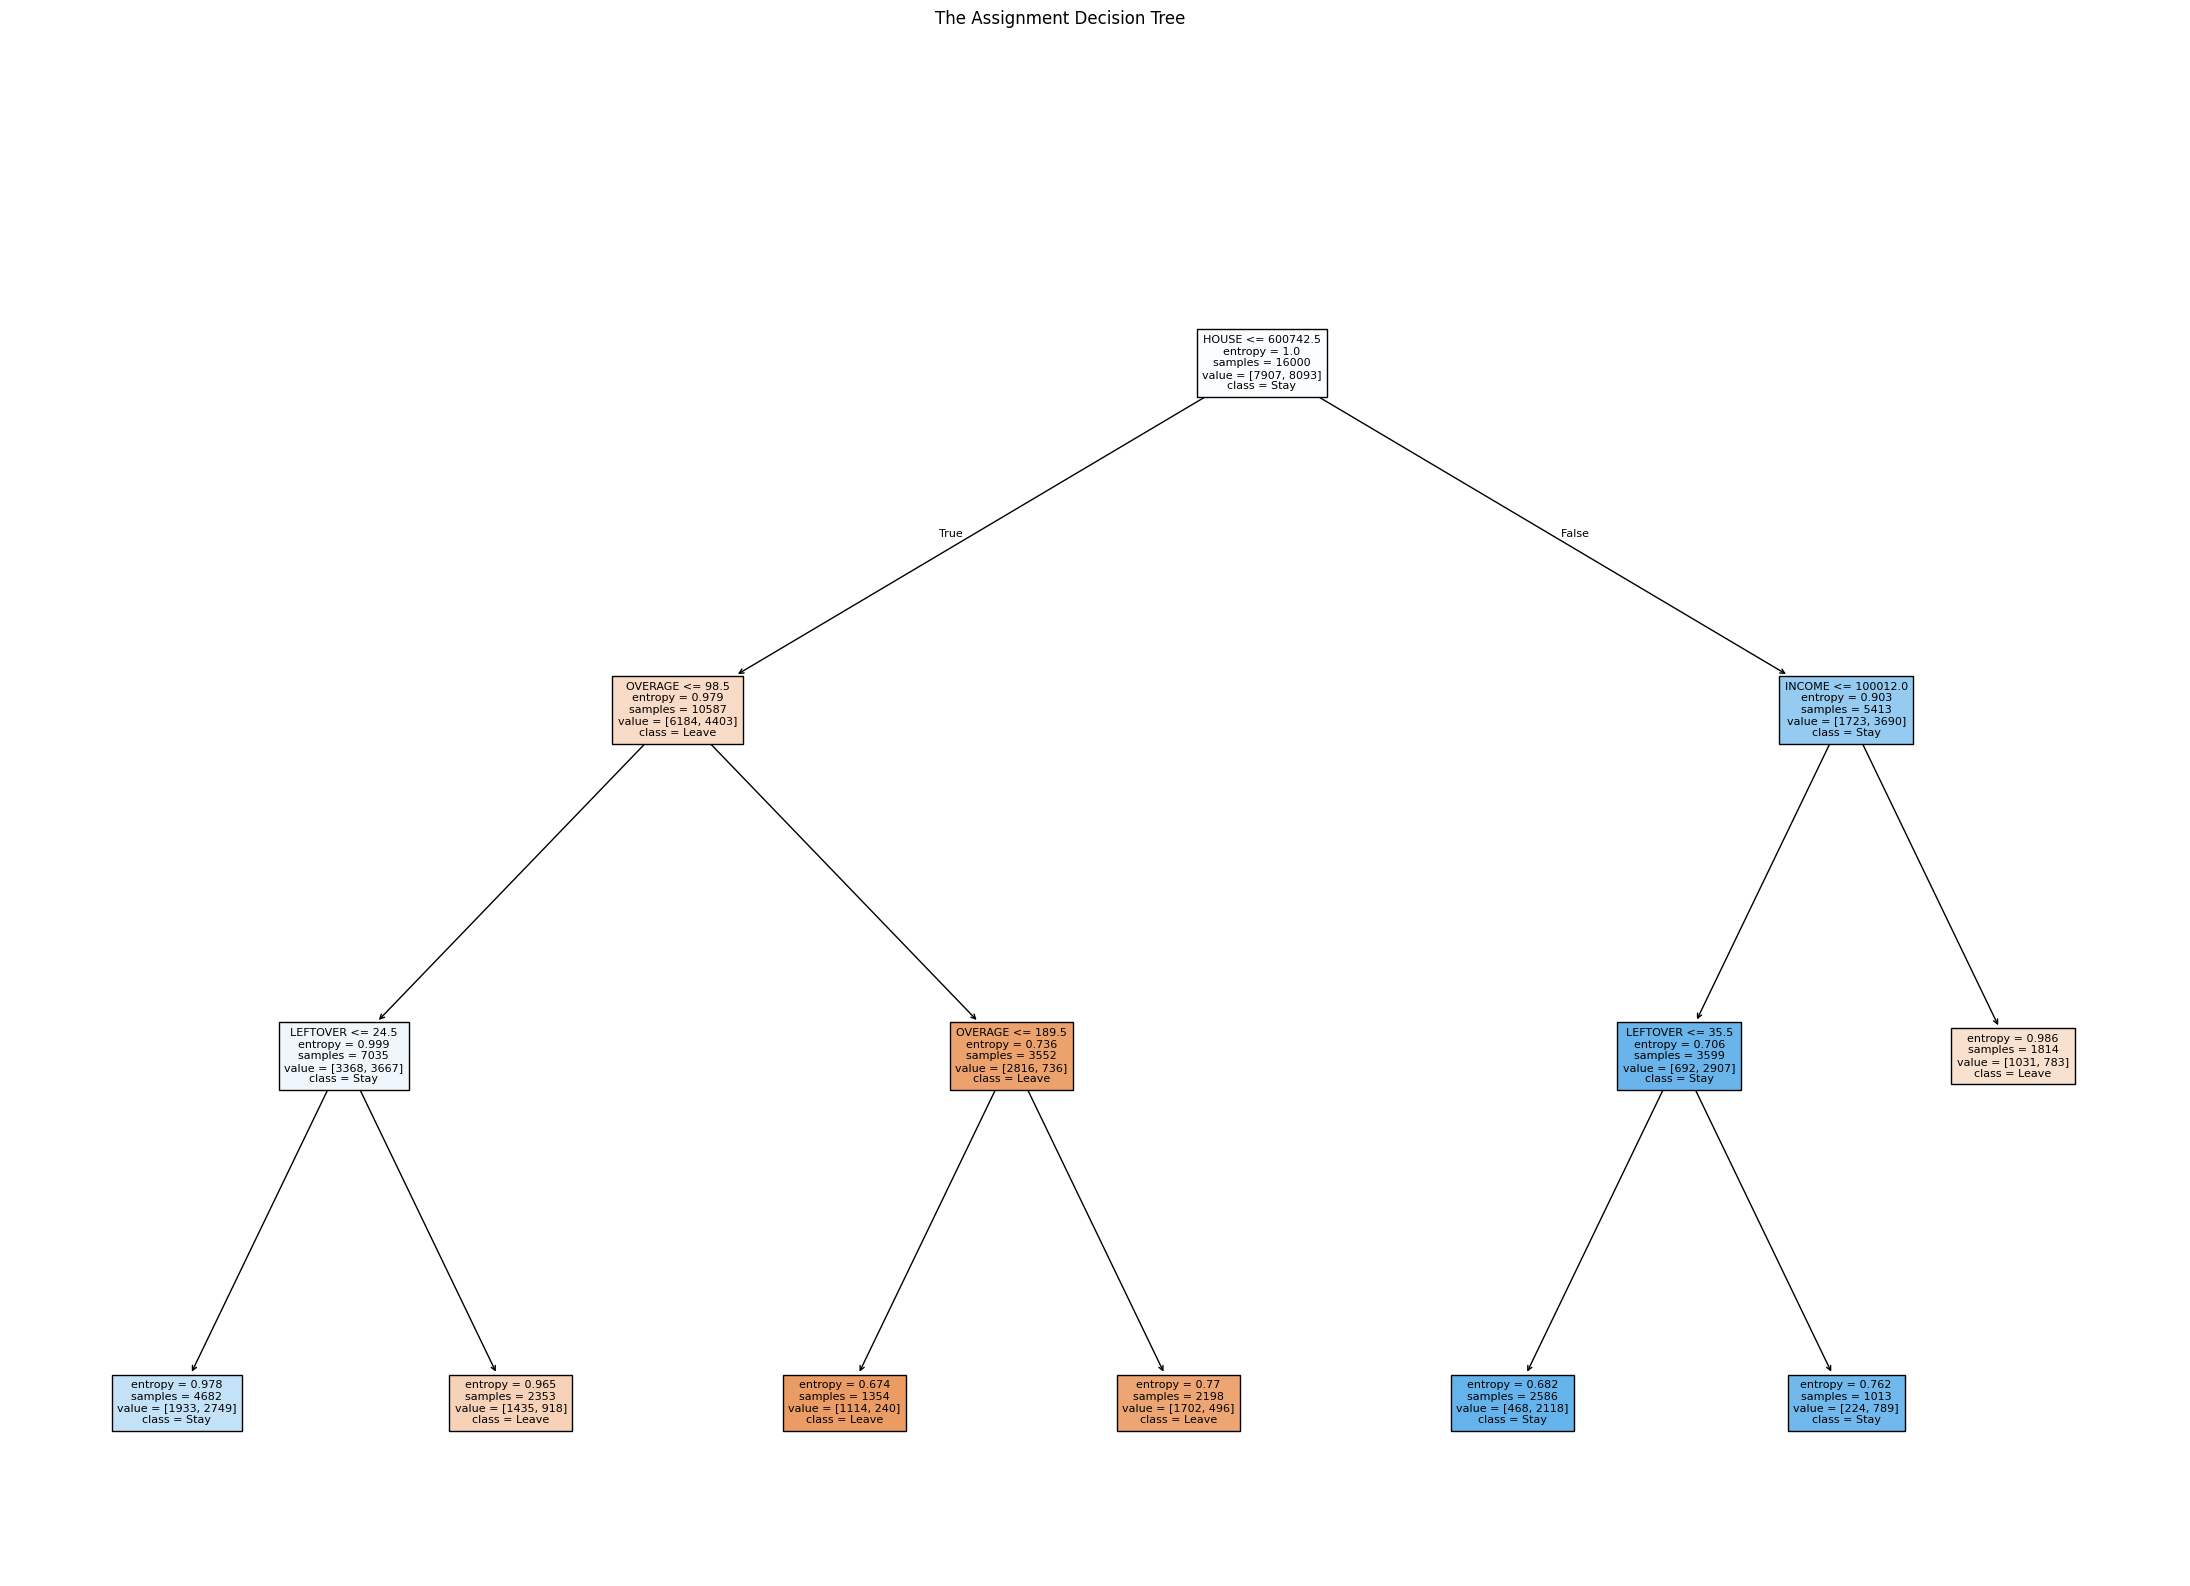

In [78]:
fig = plt.figure(figsize=(28,18))                

plot_tree(decision_tree = model2, 
          feature_names = features_train.columns,       
          class_names = ['Leave','Stay'],        
          filled = True,                         
          fontsize = 8);   

fig.suptitle('The Assignment Decision Tree'); 

(d) Apply model2 to predict the class labels and estimate the class probabilities for test set only.  Display the results for the first five test instances only.

In [79]:
test_pred = model2.predict(features_test)

test_pred[:5]

array(['LEAVE', 'LEAVE', 'STAY', 'STAY', 'LEAVE'], dtype=object)

(e) Check model2’s performance on the test set.  Round the result to 2 decimal places.

In [82]:
acc = accuracy_score(target_test, test_pred) 

np.round(acc,2)

np.float64(0.7)